In [27]:
from pyspark import SparkConf, SparkContext
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**SparkConf** 사용자가 재정의해서 쓸 수 있는 설정 옵션들에 대한 Key와 Value를 갖고 있는 객체
**SparkContext** Spark 클러스터와 연결시켜주는 객체

- Spark 모든 기능에 접근할 수 있는 시작점
- Spark는 분산환경에서 동작하기 때문에 Driver Program을 구동시키기 위해 SparkContext가 필요함
- SparkContext는 프로그램당 하나만 만들 수 있고 사용후에는 종료


## SparkContext 초기화

![sparkcontext](assets/sparkcontext.png)

* SparkContext 객체는 내부에 자바로 동작하는 Py4J의 SparkContext와 연결
* 이 덕분에 파이썬으로 코딩하면서도 자바 위에서 동작하는 프로그램을 작성할 수 있다 
* RDD를 만들 수 있다

In [8]:
# SparkContext 초기화 및 Spark 객체 설정
conf = SparkConf().setMaster('local').setAppName('uber-date-trips')
sc = SparkContext(conf=conf)

In [9]:
sc

<SparkContext master=local appName=uber-date-trips>

In [10]:
# folder_name = '/Users/hangdori/_PML/fc_spark/data'
folder_name = '/Users/lifelog/_PML/fc_spark/data'
file_name = 'fhvhv_tripdata_2020-03.csv'

### 데이터 로딩 후 RDD 생성

In [12]:
lines = sc.textFile(f"file:///{folder_name}/{file_name}")

### 필요한 부분만 추출

In [14]:
header = lines.first() # 첫 줄..!
filtered_lines = lines.filter(lambda x: x != header)

In [18]:
dates = filtered_lines.map(lambda x: x.split(',')[4].split(' ')[0])

In [26]:
result = dates.countByValue()
result

defaultdict(int,
            {'2020-03-01': 780219,
             '2020-02-29': 5603,
             '2020-03-02': 648912,
             '2020-03-03': 697798,
             '2020-03-04': 708065,
             '2020-03-05': 731656,
             '2020-03-06': 873517,
             '2020-03-07': 887260,
             '2020-03-08': 728148,
             '2020-03-09': 628813,
             '2020-03-10': 626369,
             '2020-03-11': 628609,
             '2020-03-12': 643230,
             '2020-03-13': 661432,
             '2020-03-14': 569556,
             '2020-03-15': 447181,
             '2020-03-16': 391081,
             '2020-03-17': 312085,
             '2020-03-18': 269258,
             '2020-03-19': 252764,
             '2020-03-20': 262023,
             '2020-03-21': 215661,
             '2020-03-22': 162004,
             '2020-03-23': 162343,
             '2020-03-24': 141719,
             '2020-03-25': 141074,
             '2020-03-26': 141644,
             '2020-03-27': 159481,
     

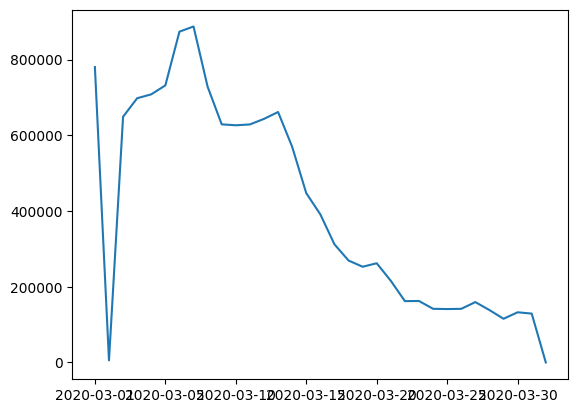

In [32]:
pd.Series(result, name='trips').plot()
plt.show()